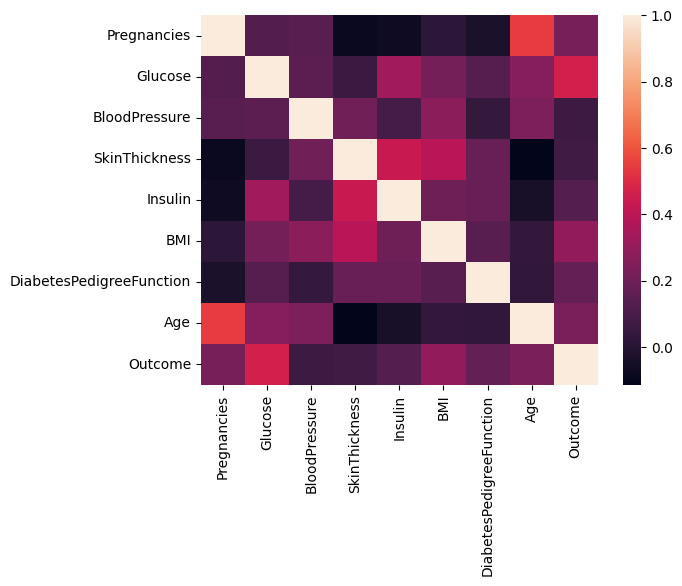

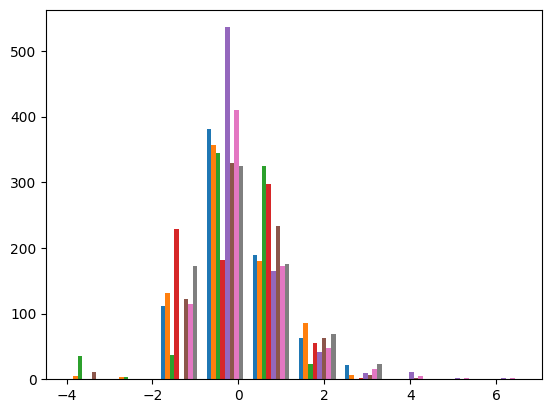

F1 score: 0.733


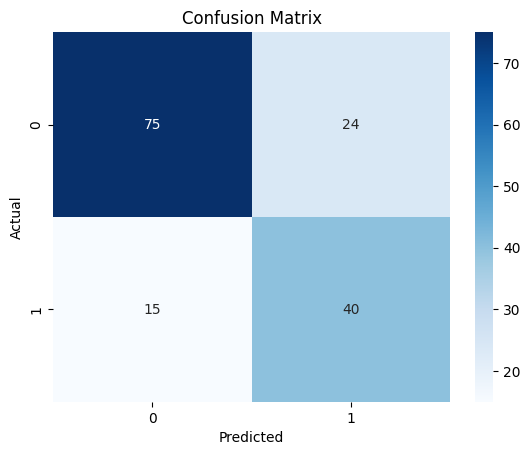

AUC score: 0.742


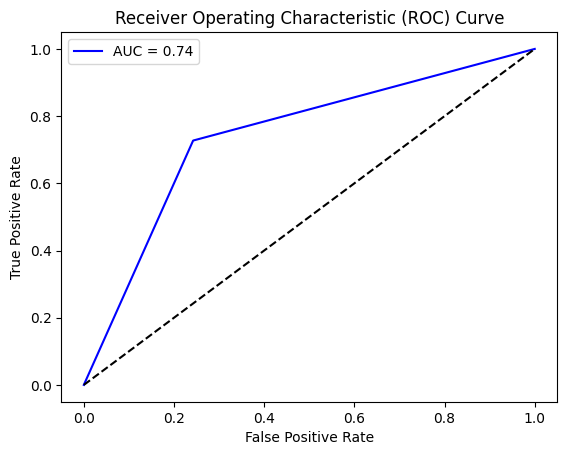

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# Load the dataset into a pandas DataFrame
df = pd.read_csv('diabetes.csv')

#Correlation Matirx
sns.heatmap(df.corr(),annot=False)
plt.show()

# Separate the target variable from the features
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Impute NaN values using mean imputation
mean_value=X.mean()
X = X.fillna(value=mean_value, inplace=False)

# Scale the features
for column in X.keys():
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

plt.hist(X)
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

########################################################################################################
# Initialize a decision tree classifier with default parameters
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training data
dtc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtc.predict(X_test)
########################################################################################################

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 score: {f1:.3f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
print(f"AUC score: {auc:.3f}")

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
